<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Neuroscience of Learning, Memory, Cognition <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 <br>
<font color=696880 size=4>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*TA: Matin Arman Mehr* <br>
*Email: matinarmanmehr@proton.me* <br>

***If you have any issues or questions, please feel free to email me or send your messages in the Telegram group.***

# Student Information
Fill the desired information here

In [ ]:
Student_Name = "Armin Navardi"
Student_ID = "99105129"

print("Student_Name:",Student_Name)
print("Student_ID:",Student_ID)

Student_Name: Armin Navardi
Student_ID: 99105129


# Introduction
Local Field Potential (LFP) signals possess the capability to provide us with highly valuable and detailed insights into the functioning of the brain. In this practice, we will undertake the analysis of the LFP signal derived from the brain of an anesthetized rat during an olfactory task. <br>
The LFP signal that is given to you comprises three distinct channels: <br>

&emsp;  1. Hippocampus (HPC) <br>
&emsp;  2. Olfactory Tubercle (OT) <br>
&emsp;  3. Medial Prefrontal Cortex (mPFC) <br>

Throughout the task, the anesthetized rat was exposed to two different odorants: <br>

&emsp;  1. Banana (tag = "20") <br>
&emsp;  2. Lime (tag = "40") <br>

Each odorant was presented with an equal probability of 50%. This implies that 50% of the time, the rat was exposed to the banana odor, and the remaining 50% to the lime odor. Upon cessation of odorant release, the resting state (tag = "10") commenced, devoid of any odor stimuli. <br>

**Note that the 4th channel is digitalByte which contains the events tags [10,20,40] in time.**

`Theorical Question 1:` Investigate the functions of the LFP channels (HPC, OT, mPFC) in rats brain and write a paragraph for each of them. (**Note: Academic references must be used**). *`5 Points`* <br>

The hippocampus is a crucial brain structure involved in memory formation, spatial navigation, and learning. The hippocampus exhibits prominent theta oscillations (4–10 Hz) during exploration and memory tasks. These oscillations are associated with spatial coding and memory consolidation.
Zippo, A. G., Storchi, R., Nencini, S., Caramenti, G. C., Valente, M., & Biella, G. E. (2013). Neuronal Functional Connection Graphs among Multiple Areas of the Rat Somatosensory System during Spontaneous and Evoked Activities. PLOS Computational Biology


The olfactory tubercle (OT), also known as the tuberculum olfactorium, is a multi-sensory processing center that is contained within the olfactory cortex and ventral striatum and plays a role in reward cognition. The OT has also been shown to play a role in locomotor and attentional behaviors, particularly in relation to social and sensory responsiveness, and it may be necessary for behavioral flexibility. The OT is interconnected with numerous brain regions, especially the sensory, arousal, and reward centers, thus making it a potentially critical interface between processing of sensory information and the subsequent behavioral responses.

The OT is a composite structure that receives direct input from the olfactory bulb and contains the morphological and histochemical characteristics of the ventral pallidum and the striatum of the forebrain.

The olfactory tubercle (OT), which is a component of the olfactory cortex and
ventral striatum, has functional domains that play a role in odor-guided motivated
behaviors

Md Fazley Rabbi Sha, Yuriko Koga, Yoshihiro Murata,
Mutsuo Taniguchi and Masahiro Yamaguchi, 'Learning-dependent structural plasticity of intracortical and sensory connections to functional domains of the olfactory tubercle'

The mPFC plays a central role in cognitive control, decision-making, and emotional regulation.
Theta and Beta Oscillations: LFPs in the mPFC exhibit theta (4–8 Hz) and beta (15–30 Hz) oscillations. Theta oscillations are associated with working memory and attention, while beta oscillations relate to cognitive flexibility and decision-making.

 How Is Single-Neuron Activity Related to LFP Oscillations? (2019). In Single Neuron Studies of the Human Brain (pp. 1–16). Springer. DOI: 10.1007/978-3-031-20910-9_44

# Import Libraries

In [ ]:
%pip install pymatreader
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pymatreader
import scipy as sp
import pandas as pd
import math

#################################
# Import your necessary libraries
#################################

# Reading the Data
Import the `data.mat` file that is given to you by using pymatreader library. Add all of the dataset information into the *`data`* dict file. *`5 Points`*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = {}
data['srate'] = 2000                            # Sampling rate
data['channel_names'] = ['HPC','OT','mPFC']     # The name of each channel
data['events'] = ['rest','banana','lime']       # Events names
data['tags'] = [10,20,40]                       # Tag of each event

###########################################################
# TO DO: Import the data and add it to the main *data dict
###########################################################

data['channels'] = pymatreader.read_mat('/content/drive/MyDrive/data.mat')['channelData'].T
print(data['channels'].shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(4, 3596943)


# Plot the raw LFP
Let's plot the first `2.5s` of each channels' signal! *`3 Points`*

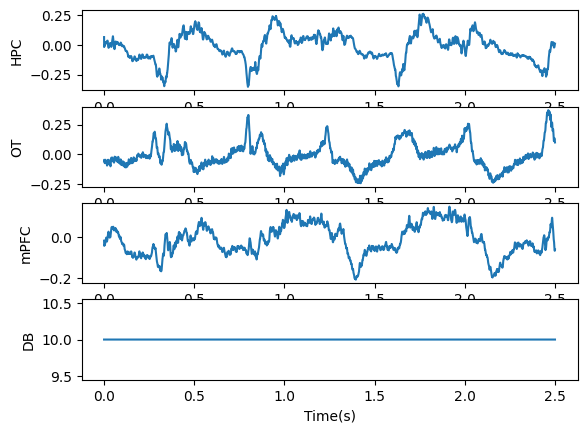

In [ ]:

#################################################
# TO DO: plot the raw LFP signal for each channel.
#################################################
ch_names = ['HPC', 'OT', 'mPFC', 'DB']
fs = data['srate']
L = int(2.5*fs)
t = np.arange(L)/fs
plt.subplot(4, 1, 1)
plt.plot(t, data['channels'][0][:L], label=ch_names[0])
plt.ylabel(ch_names[0])
plt.xlabel('Time(s)')
plt.subplot(4, 1, 2)
plt.plot(t, data['channels'][1][:L], label=ch_names[1])
plt.ylabel(ch_names[1])
plt.xlabel('Time(s)')
plt.subplot(4, 1, 3)
plt.plot(t, data['channels'][2][:L], label=ch_names[2])
plt.ylabel(ch_names[2])
plt.xlabel('Time(s)')
plt.subplot(4, 1, 4)
plt.plot(t, data['channels'][3][:L], label=ch_names[3])
plt.ylabel(ch_names[3])
plt.xlabel('Time(s)')

plt.show()


# Power Spectrum Density (PSD)
Calculate and plot the power spectrum density for the frequency range up to 40Hz in each channel of the raw LFP signals. You can employ a simple FFT for this task. *`5 Points`*

In [ ]:
import scipy

def calc_PSD(data):

    ##############################
    # TO DO: Complete the function
    ##############################
    n = data.shape[-1]
    freqs = np.fft.fftfreq(n, d=1/fs)
    fft = scipy.fftpack.fft(data, axis=-1)
    PSD = np.abs(fft)**2/n

    return freqs[(np.abs(freqs) < 40) & (freqs > 0)], PSD[:, (np.abs(freqs) < 40) & (freqs > 0)]
    pass

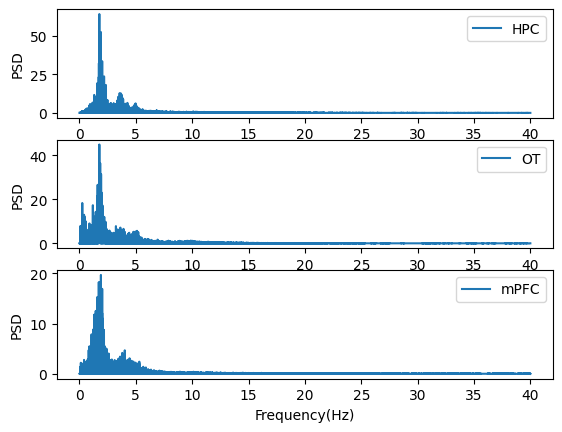

In [ ]:

####################################################################
# To Do: Use your function to calculate the PSD and plot the results
####################################################################

f, PSD = calc_PSD(data['channels'])

for i in range(3):
  plt.subplot(3, 1, i+1)
  plt.plot(f, PSD[i, :], label=ch_names[i])
  plt.ylabel('PSD')
  plt.xlabel('Frequency(Hz)')
  plt.legend()

plt.show()

Compute the average power of the theta band (4Hz-8Hz) for each channel and create a bar plot to display the results. *`2 Points`* <br>

In [ ]:

##################################################
# TO DO: Plot the theta band power of each channel
##################################################

average_power = []

for i in range(3):
  idx = np.where((4<=f) & (f<=8))
  average_power.append(np.mean(PSD[i, idx]))

plt.bar(range(3), average_power, tick_label=[f"{ch_names[i]}" for i in range(3)])
plt.ylabel("Average Theta Power")
plt.title("Average Theta Power in Each Channel")
plt.grid(axis="y")
plt.show()

print(average_power)

The plot should be like this: <br>

![](https://github.com/arminnv/Neuroscience-Learning-Memory-and-Cognition-Spring-2024/blob/main/Figures/01.png?raw=1)

`Theorical Question 2:` Why is the theta power is higher in the hippocampus compared to other regions? Do a little research :D *`3 Points`*

Answer:

The hippocampus is the main structure involved in the generation of the 4- to 12-Hz theta (θ)
rhythm. Interest in θ has flourished from the abundant data indicating that the rhythm is linked with
integrative processes critical for higher cognitive functions. Thus, neuronal spiking in widespread
brain regions is phase locked to hippocampal θ oscillations, including somatosensory, entorhinal,
or prefrontal cortices (Alonso and Garcia-Austt, 1987; Nuñez et al., 1991, 2006; Kocsis and Vertes,
1994; Hanada et al., 1999; Sirota et al., 2008).
A slow oscillatory activity with the properties of θ was first described in the hippocampus by Jung
and Kornmüller (1938). However, the original detailed analysis of hippocampal θ was provided
by Green and Arduini (1954). Green and Arduini (1954) showed that θ was associated with an
irregular desynchronized activity in the cortex, whereas in contrast, synchronized cortical activity
was concurrent with irregular activity in the hippocampus. This link between hippocampal and
cortical activities suggested a close relation of θ with attention, information processing, higher
brain functions, and cognition, giving rise to a rapidly growing interest in θ

Research has revealed that theta oscillations in the hippocampus are generated by multiple interdependent dipoles (current sinks and sources). These dipoles arise due to rhythmic ion flow into and out of hippocampal cells.

# Preprocessing
First thing first, filter each channel between 0.5Hz-128Hz. *`3 Points`* <br>
**Note: Use zero-phase filter to maintain the time features of the signals after filtering.**

In [ ]:
def BPF_filter(data,frq_low,frq_high,filt_order):

    ##############################
    # To Do: complete the function
    ##############################

    b, a = scipy.signal.butter(filt_order, [frq_low, frq_high], btype='band', fs=fs)
    filtered_signal = scipy.signal.filtfilt(b, a, data, axis=-1)

    return filtered_signal
    pass


filtered_signal = BPF_filter(data['channels'], 0.5, 128, 8)

Next, epoch the data according to each event (banana and lime) as you've done at the previous practice. Each trial must contain `1.5` seconds before and `3` seconds after the onset of each stimulus. Consider computing zscore of time series in each trial. *`3 Points`*

In [ ]:
def epoch_data(data, time_interval):

    ##############################
    # To Do: complete the function
    ##############################
    data_epoched = {}

    data_epoched['data_Banana'] = np.array([data[:3, i-int(1.5*fs):i+3*fs] for i in range(data.shape[1]) if (data[3, i]==20)and(data[3, i-1]!=20)])
    data_epoched['data_Lime'] = np.array([data[:3, i-int(1.5*fs):i+3*fs] for i in range(data.shape[1]) if (data[3, i]==40)and(data[3, i-1]!=40)])

    Trials = data_epoched['data_Banana']
    mean = np.mean(Trials, keepdims=True)
    std = np.std(Trials, keepdims=True)
    for i in range(Trials.shape[0]):
      Trials[i] = (Trials[i]-mean)/(std+1e-4)

    data_epoched['data_Banana'] = Trials

    Trials = data_epoched['data_Lime']
    mean = np.mean(Trials, keepdims=True)
    std = np.std(Trials, keepdims=True)
    for i in range(Trials.shape[0]):
      Trials[i] = (Trials[i]-mean)/(std+1e-4)

    data_epoched['data_Lime'] = Trials

    return data_epoched
    pass

data_epoched = epoch_data(data['channels'], 100)

print(data_epoched['data_Banana'].shape)

(24, 3, 9000)


# Event-Related Potential (ERP)
Compute the Event-Related Potential (ERP) for each channel and event in all channels as you've done at the previous practice. Plot them for each event. *`5 Points`* <br>
 **Note: Consider using baseline rejection: ERP_signal - mean(ERP_signal(before stimulus))**

In [ ]:
def calc_ERP(data):

    ##############################
    # To Do: complete the function
    ##############################
    erp = np.mean(data, 0)
    erp -= np.mean(erp[:, :int(1.5*fs)], -1, keepdims=True)

    return erp
    pass


(3, 9000)


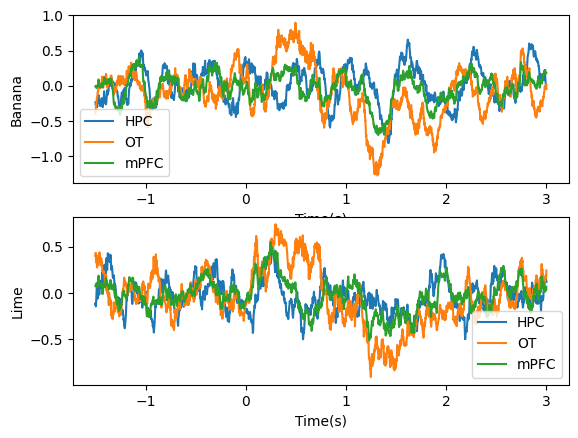

In [ ]:

####################################################################
# To Do: Use your function to calculate the ERP and plot the results
####################################################################

ERP_banana = calc_ERP(data_epoched['data_Banana'])
ERP_lime = calc_ERP(data_epoched['data_Lime'])
print(ERP_banana.shape)

t = np.arange(ERP_banana.shape[-1])/fs-1.5

for i in range(3):
  plt.subplot(2, 1, 1)
  plt.plot(t, ERP_banana[i], label=ch_names[i])
  plt.xlabel('Time(s)')
  plt.ylabel('Banana')
  plt.legend()
  plt.subplot(2, 1, 2)
  plt.plot(t, ERP_lime[i], label=ch_names[i])
  plt.xlabel('Time(s)')
  plt.ylabel('Lime')
  plt.legend()

plt.show()


You should generate a plot like this for each odorant: <br>

![](https://github.com/arminnv/Neuroscience-Learning-Memory-and-Cognition-Spring-2024/blob/main/Figures/03-ERP-ban.png?raw=1)

# Phase-Lock Value (PLV)

In the previous practice, you studied the phase-lock value as a method for evaluation of functional connectivity between different parts of brain. Now, we aim to implement it for the olfactory task and investigate the effect of odorants on the connections between channels. You can use [this paper](https://doi.org/10.1016%2Fj.neuroimage.2013.02.008) for more help. <br>

Compute the phase-lock value between different channels for `1.5sec` before and `1.5sec` after the onset of the stimulus for each trials across a frequency range of `20Hz-60Hz` for both odorants. Next, determine the mean and standard error of the calculated phase-lock values across trials. At the end, create a plot showing the bounded lines for phase-lock values at various frequencies. Compare the results before and after stimulus. *`20 Points`*

In [ ]:
def calc_PLV(data, frq_range, time_range, filt_order):

    ##############################
    # To Do: complete the function
    ##############################

    plv = [[], [], []]
    pairs = [[0, 1], [1, 2], [2, 0]]

    data = data[:, time_range[0]:time_range[1]]


    for i in range(3):
      for freq in range(frq_range[0], frq_range[1], 1):

        data_filtered = BPF_filter(data, freq-0.5, freq+0.5, filt_order)

        y1 = data_filtered[pairs[i][0]]
        y2 = data_filtered[pairs[i][1]]

        #print(y1)

        sig1_hill = scipy.signal.hilbert(y1)
        sig2_hill = scipy.signal.hilbert(y2)

        phase_y1 = np.unwrap(np.angle(sig1_hill))
        phase_y2 = np.unwrap(np.angle(sig2_hill))


        Inst_phase_diff = phase_y1-phase_y2
        #print(plv[i])
        plv[i].append(np.abs(np.mean(np.exp(1j*Inst_phase_diff))))

    return np.array(plv)

    pass

#print(calc_PLV(data_epoched['data_Banana'][0], [20, 60], [0, 100], 4).shape)

24
24


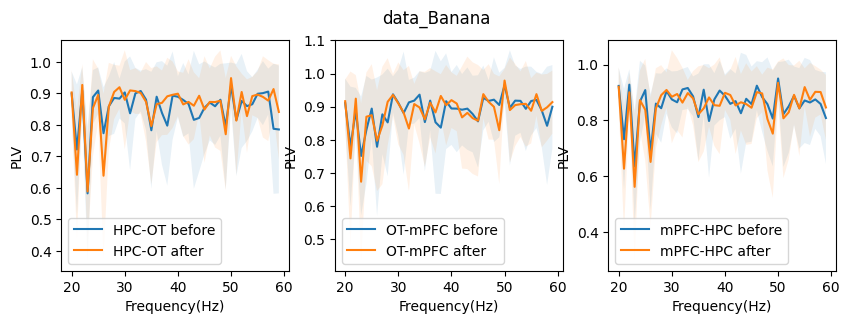

26
26


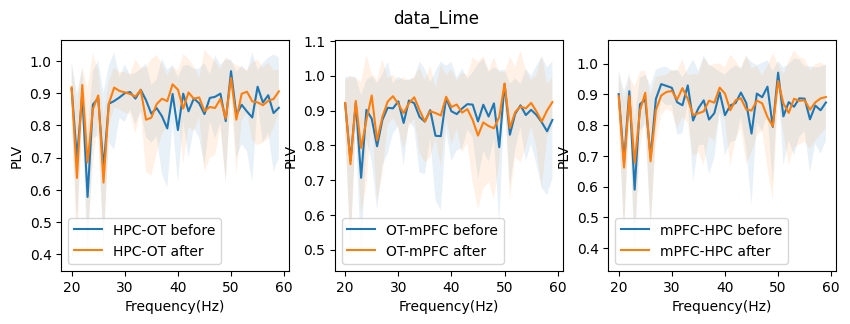

In [ ]:

####################################################################
# To Do: Use your function to calculate the PLV and plot the results
####################################################################

time_ranges = [[0, int(1.5*fs)], [int(1.5*fs), 3*fs]]
stimulus = ['data_Banana', 'data_Lime']
plv_names = ['HPC-OT', 'OT-mPFC', 'mPFC-HPC']
t_names = ['before', 'after']


for stimuli in stimulus:
  figure = plt.figure(figsize=(10, 3))
  for t in range(len(time_ranges)):
    print(data_epoched[stimuli].shape[0])
    plv = []

    n_trials = data_epoched[stimuli].shape[0]
    for k in range(n_trials):

      plv.append(calc_PLV(data_epoched[stimuli][k], [20, 60], time_ranges[t], 4).T)

    plv = np.array(plv)
    mean = np.mean(plv, 0)
    std = np.std(plv, 0)
    for ch in range(3):
      plt.subplot(1, 3, ch+1)
      f = np.arange(plv.shape[1])/plv.shape[1]*40+20
      plt.fill_between(f, mean[:, ch]+std[:, ch], mean[:, ch]-std[:, ch], alpha=.1)
      plt.plot(f, mean[:, ch], label=plv_names[ch]+' '+t_names[t])
      plt.xlabel('Frequency(Hz)')
      plt.ylabel('PLV')
      plt.legend()

  figure.suptitle(stimuli)
  plt.show()




You should generate plots like this between all channels for both odorants:<br>

![](https://github.com/arminnv/Neuroscience-Learning-Memory-and-Cognition-Spring-2024/blob/main/Figures/02-PLV.png?raw=1)

# Phase-Amplitude Coupling (PAC)

One of the recent methods used for studying functional connectivity is Phase-Amplitude Coupling (PAC). This method is widely used to explain the way of communication among various neural populations in the brain. For more detailed information on PAC and how it's calculated, you can refer to [this paper](https://doi.org/10.1038/s41598-019-48870-2). Moreover, [this paper](https://doi.org/10.1038/s41598-019-43272-w) has also explained how different neural networks communicate through their theta and gamma oscillations to transfer information.

`Theorical Question 3:` Read both papers and explain the process of calculating PAC and how we infer PAC as a metric for communication between different neural oscillations. `5 Points`

**Note: You don't have to read both papers in detail; just simply collect the information you NEED :D**

Process of calculating PAC:
1. Calculating Rihaczek distribution of each channel
2. Calculating amplitude of a specific frequency at time t by using Rihaczek distribution
3. Calculating phase of a specific frequency at time t by using Rihaczek distribution
4. Calculating PAC from the instantaneous amplitude and phase at different frequencies by using PLV or MLV or MI


PAC reflects the functional coupling between different neural oscillations. When low-frequency oscillations are in a specific phase, they enhance the excitability of neurons.
High-frequency oscillations then synchronize their firing during this phase, leading to effective communication.Low-frequency brain activity modulates the amplitude of high-frequency oscillations.

Now, we aim to analyze the data and compute the Phase-Amplitude Coupling (PAC) for each channel. First thing first, as explained in [the paper](https://doi.org/10.1038/s41598-019-48870-2) you've read, we need to find the Bilinear time–frequency distribution of the signal using the RID-Rihaczek method. The code for this is provided below:

In [ ]:
## DON'T CHANGE THE CODES OF THIS BLOCK

def _rhu(n):
    '''
    Return integer rounded of the input. The half will round up.
    1.3 -> 1
    2.5 -> 3
    -0.5 -> 0
    -0.3 -> -1
    '''
    return int(math.floor(n + 0.5))


def _datawrap(x: np.ndarray, n: int) -> np.ndarray:
    '''
    The calculation of signal spectrum, such as periodogram, uses FFT internally,
    where the length of FFT is denoted as NFFT. In theory, when using FFT,
    the signal in both time domain and frequency domain are discrete and periodic,
    where the period is given by NFFT. Hence, if you specify an NFFT that is less
    than the signal length, it actually introduces the aliasing in the time domain
    and make the signal (even if its length is N>NFFT) periodic with NFFT.
    When you take FFT of this sequence, you are working with this aliased sequence.
    This is what datawrap do for you.

    For example: Sequence 1 2 3 4 5, period 5, it returns
        1 2 3 4 5
                  1 2 3 4 5
                            1 2 3 4 5
        --------------------------------
              ... 1 2 3 4 5 ...

    i.e., original series. assume a period of 3, then it looks like

        1 2 3 4 5
              1 2 3 4 5
                    1 2 3 4 5
        ------------------------
          ... 5 7 3 ...

    A sequence that is wrapped around and has only a length of 3.

    >>> _datawrap(range(1, 6),3)
    array([5, 7, 3])

    '''
    return np.array([sum(x[i::n]) for i in range(n)])


def _chwi_krn(D: np.ndarray, L: np.ndarray, A: int = None):
    '''

    CHWI_KRN Choi-Williams kernel function.

    https://en.wikipedia.org/wiki/Bilinear_time%E2%80%93frequency_distribution#Choi%E2%80%93Williams_distribution_function

    K = _chwi_krn(D, L, A) returns the values K of the Choi-Williams kernel function
    evaluated at the doppler-values in matrix D and the lag-values in matrix L.
    Matrices D and L must have the same size. The values in D should be in the range
    between -1 and +1 (with +1 being the Nyquist frequency). The parameter A is
    optional and controls the "diagonal bandwidth" of the kernel. Matrix K is of the
    same size as the matrices D and L. Parameter A defaults to 10 if omitted.

    Copyright (c) 1998 by Robert M. Nickel
    Revision: 1.1.1.1
    Date: 2001/03/05 09:09:36

    Written by: Mahdi Kiani, March 2021

    '''

    if A is None:
        A = 10
    K = np.exp((-1/(A*A)) * (D*D*L*L))

    return K

def rid_rihaczek(x: np.ndarray, fbins: int):
    '''
    Munia, T.T.K., Aviyente, S. Time-Frequency Based Phase-Amplitude
    Coupling Measure For Neuronal Oscillations. Sci Rep 9, 12441 (2019).
    https://doi.org/10.1038/s41598-019-48870-2

    This function computes reduced interference Rihaczek distribution

    Parameter:
        x: signal
        fbins=required frequency bins

    Returns:
        tfd = Generated reduced interference Rihaczek distribution

    Written by: Mahdi Kiani, March 2021
    '''
    tbins = x.shape[0]
    amb = np.zeros((tbins, tbins))
    for tau in range(tbins):
        amb[tau, :] = (np.conj(x) * np.concatenate((x[tau:], x[:tau])))

    ambTemp = np.concatenate(
        (amb[:, _rhu(tbins/2):], amb[:, :_rhu(tbins/2)]), axis=1)
    amb1 = np.concatenate(
        (ambTemp[_rhu(tbins/2):, :], ambTemp[:_rhu(tbins/2), :]), axis=0)

    D = np.outer(np.linspace(-1, 1, tbins), np.linspace(-1, 1, tbins), )
    K = _chwi_krn(D, D, 0.01)
    df = K[:amb1.shape[0], :amb1.shape[1]]
    ambf = amb1 * df

    A = np.zeros((fbins, tbins))
    tbins = tbins - 1

    if tbins != fbins:
        for tt in range(tbins):
            A[:, tt] = _datawrap(ambf[:, tt], fbins)
    else:
        A = ambf

    tfd = np.fft.fft(A, axis=0)

    return tfd

Next, compute the local Phase-Amplitude Coupling (l-PAC) within each channel and the inter-regional PAC (ir-PAC) across different channels for **ERP signals** Calculate these values for each phase and amplitude frequency within a time interval of `1sec` before and `1sec` after the onset of stimulation for both odorants. The phase frequency should be in the theta band `4Hz-8Hz`, and the amplitude frequency should be in the low gamma band `20Hz-60Hz`. Afterwards, plot the comodulograms ([f_phase, f_amplitude, PAC] plot) and compare the results before and after the stimulus. *`20 Points`* <br>

**Note: Ensure that the scale of PACs in plots is equalized before and after the stimulus to make them comparable.**

PAC values for each channel after stimulus are higher than before stimulus. The increase is more significant for lime.



In [ ]:
def calc_MVL(tfd1, tfd2, fph, famp):

    ##############################
    # To Do: complete the functions
    ##############################
    A1_t = np.sum(tfd1[int(famp-0.5):int(famp+0.5), :], 0)
    Phi2_t = np.angle(tfd2[fph, :])

    return np.abs(np.mean(A1_t * np.exp(1j * Phi2_t)))

    pass

def calc_PAC(data, fph_range, famp_range, time_range):

    ##############################
    # To Do: complete the function
    ##############################

    n_channels = data.shape[-2]
    lpac = np.array([[], [], []])
    irpac = np.array([[], [], []])
    pairs = [[0, 1], [1, 2], [2, 0]]

    data = data[:, time_range[0]:time_range[1]]

    fbins = 2000
    tfd = np.zeros([n_channels, fbins, data.shape[-1]]).astype(complex)


    for i in range(n_channels):
      tfd[i] = rid_rihaczek(data[i], fbins)


    famps = np.arange(int(fbins*famp_range[0]/fs), int(fbins*famp_range[1]/fs))
    fphs = np.arange(int(fbins*fph_range[0]/fs), int(fbins*fph_range[1]/fs))


    PAC = np.zeros([n_channels, n_channels, len(fphs), len(famps)])

    for ch1 in range(n_channels):
      for ch2 in range(n_channels):
        for i in range(len(fphs)):
          for j in range(len(famps)):

            mvl = calc_MVL(tfd[ch1], tfd[ch2], fphs[i], famps[j])
            PAC[ch1, ch2, i, j] = mvl

    return fphs, famps, PAC


    pass

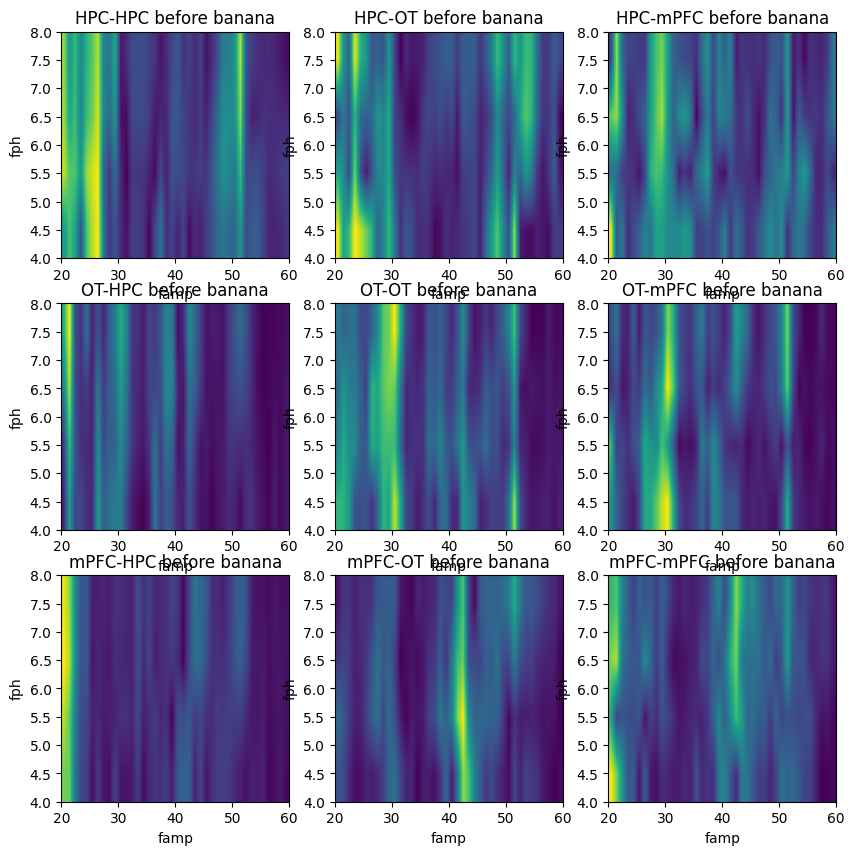

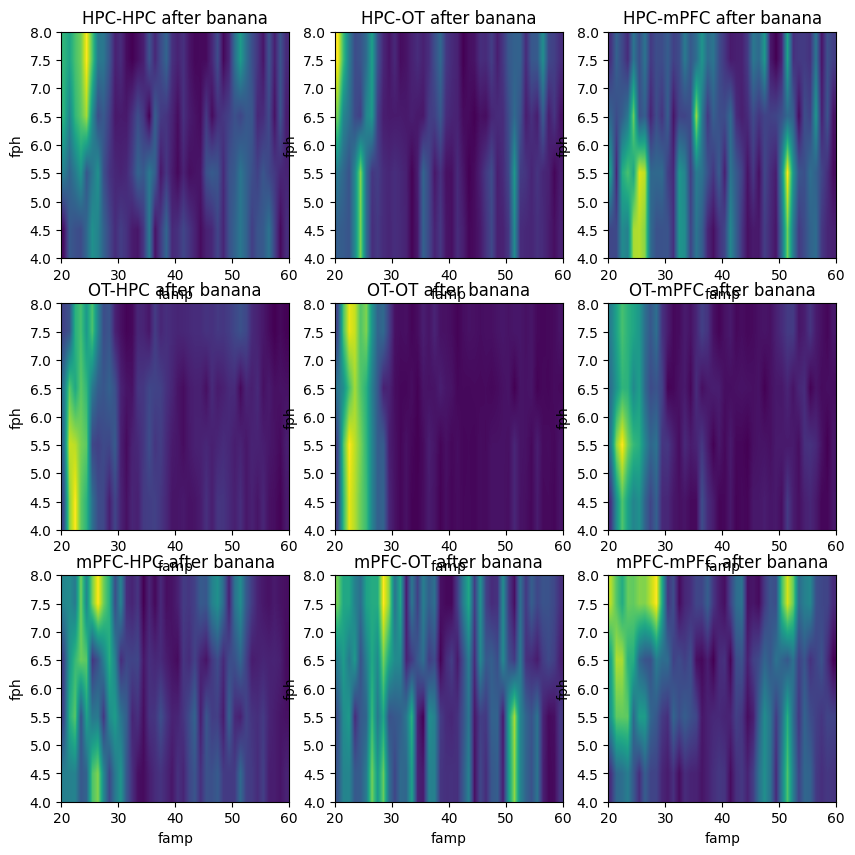

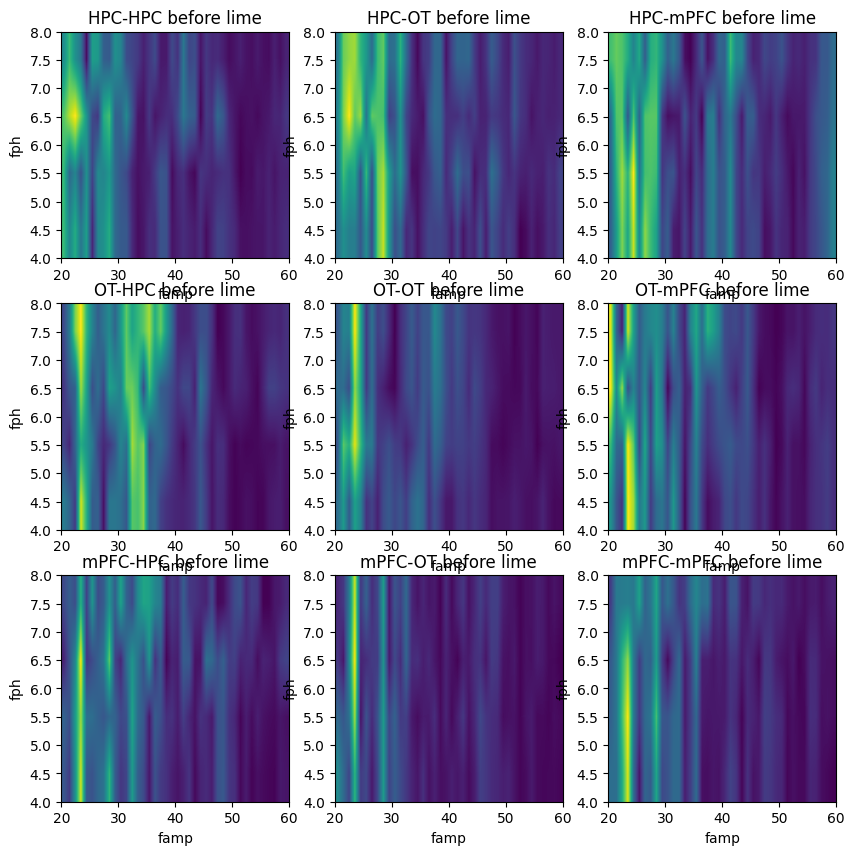

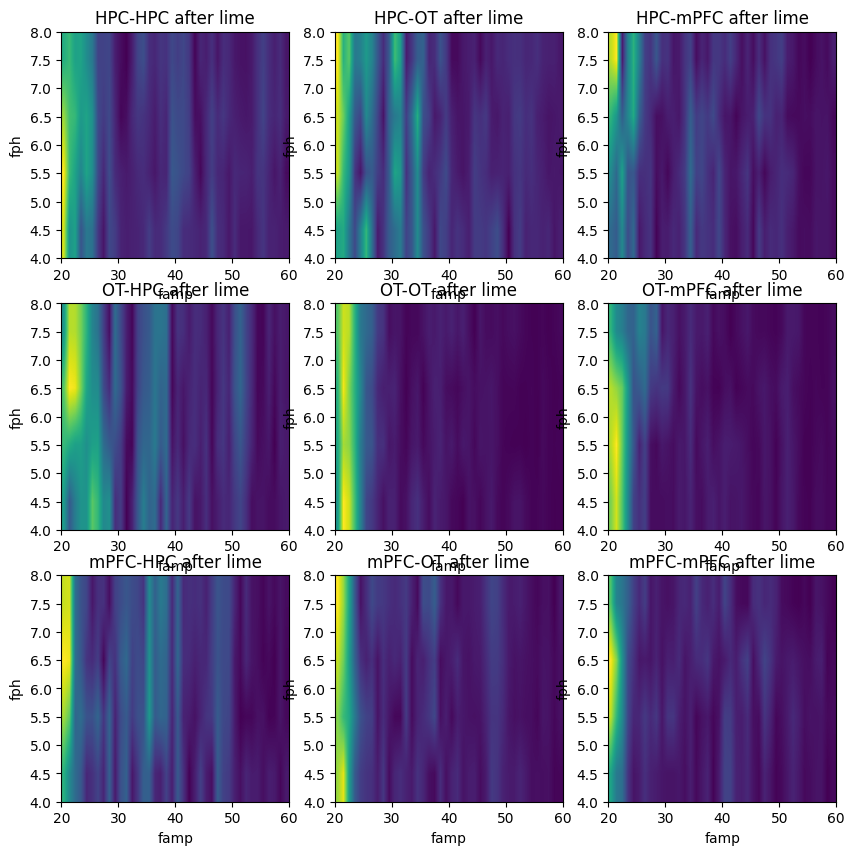

In [ ]:
####################################################################
# To Do: Use your function to calculate the PAC and plot the results
###################################################

stimulus = ['banana', 'lime']
ERP = {'banana':ERP_banana, 'lime':ERP_lime}


fig = plt.figure(figsize=(10, 10))
fphs, famps, PAC = calc_PAC(ERP['banana'], [4, 8], [20, 60], [int(0.5*fs), int(1.5*fs)])
n_plot = 0
for i in range(3):
  for j in range(3):
    n_plot += 1
    plt.subplot(3, 3, n_plot)
    plt.imshow(PAC[i, j], interpolation='bilinear', aspect='auto', extent=[20,60,4,8])
    plt.ylabel('fph')
    plt.xlabel('famp')
    plt.title(ch_names[i] +'-'+ ch_names[j]+ ' before banana')
plt.show()

fig = plt.figure(figsize=(10, 10))
fphs, famps, PAC = calc_PAC(ERP['banana'], [4, 8], [20, 60], [int(1.5*fs), int(2.5*fs)])
n_plot = 0
for i in range(3):
  for j in range(3):
    n_plot += 1
    plt.subplot(3, 3, n_plot)
    plt.imshow(PAC[i, j], interpolation='bilinear', aspect='auto', extent=[20,60,4,8])
    plt.ylabel('fph')
    plt.xlabel('famp')
    plt.title(ch_names[i] +'-'+ ch_names[j]+ ' after banana')
plt.show()


fig = plt.figure(figsize=(10, 10))
fphs, famps, PAC = calc_PAC(ERP['lime'], [4, 8], [20, 60], [int(0.5*fs), int(1.5*fs)])
n_plot = 0
for i in range(3):
  for j in range(3):
    n_plot += 1
    plt.subplot(3, 3, n_plot)
    plt.imshow(PAC[i, j], interpolation='bilinear', aspect='auto', extent=[20,60,4,8])
    plt.ylabel('fph')
    plt.xlabel('famp')
    plt.title(ch_names[i] +'-'+ ch_names[j]+ ' before lime')
plt.show()


fig = plt.figure(figsize=(10, 10))
fphs, famps, PAC = calc_PAC(ERP['lime'], [4, 8], [20, 60], [int(1.5*fs), int(2.5*fs)])
n_plot = 0
for i in range(3):
  for j in range(3):
    n_plot += 1
    plt.subplot(3, 3, n_plot)
    plt.imshow(PAC[i, j], interpolation='bilinear', aspect='auto', extent=[20,60,4,8])
    plt.ylabel('fph')
    plt.xlabel('famp')
    plt.title(ch_names[i] +'-'+ ch_names[j]+ ' after lime')
plt.show()

You should generate plots like this between all channels for both odorants:<br>

![](https://github.com/arminnv/Neuroscience-Learning-Memory-and-Cognition-Spring-2024/blob/main/Figures/04-PAC-comodulo.png?raw=1) <br>
*figure description: comodulogram of hippocampus theta phase and hippocampus low gamma amplitude*

# Time-Varying Phase-Amplitude Coupling (tv-PAC)

In this section, we aim to analyze the dynamics of Phase-Amplitude Coupling (PAC) over time. This can be achieved using a sliding window technique. Set the window size to `0.25sec` and slide it with `75%` overlap across the ERP signals for each channel in both odorants. Within each window, calculate the PAC and then average it over the phase frequency range of theta band `4Hz-8Hz`. Finally, generate time-frequency plots for PAC between each pair of channels (local PAC and inter-regional PAC). You can use the `calc_PAC()` function you've written in the previous section. Compare the results and find the effect of odorants in the neural connectivities. *`20 Points`*

PAC values for each channel after onset of the stimulus are higher than before stimulus. The increase is more significant for lime.

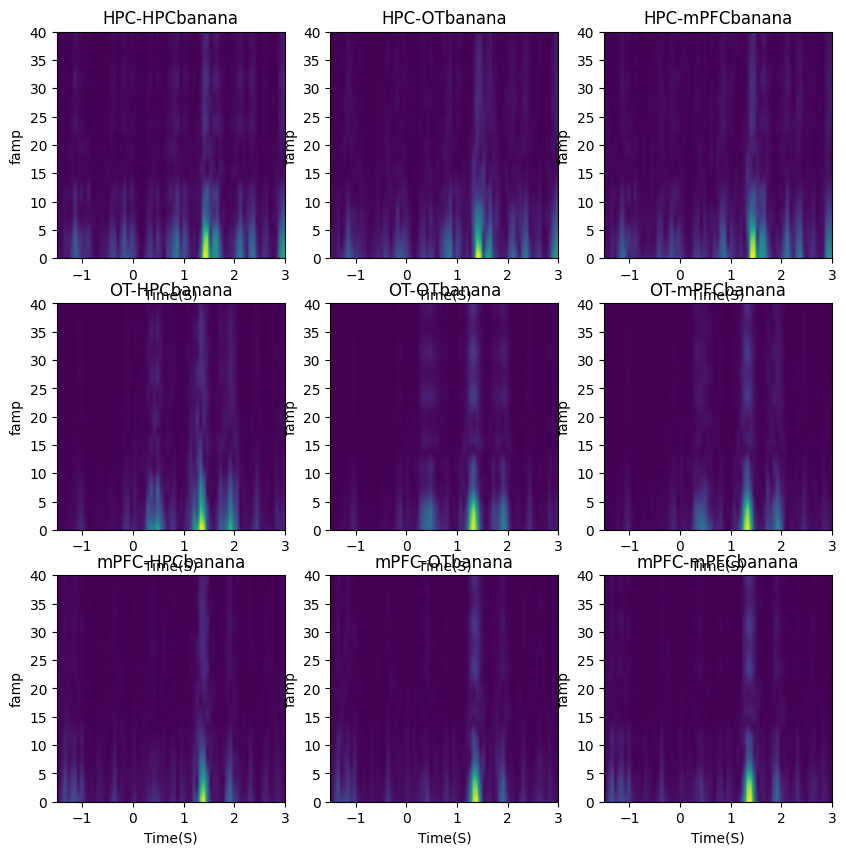

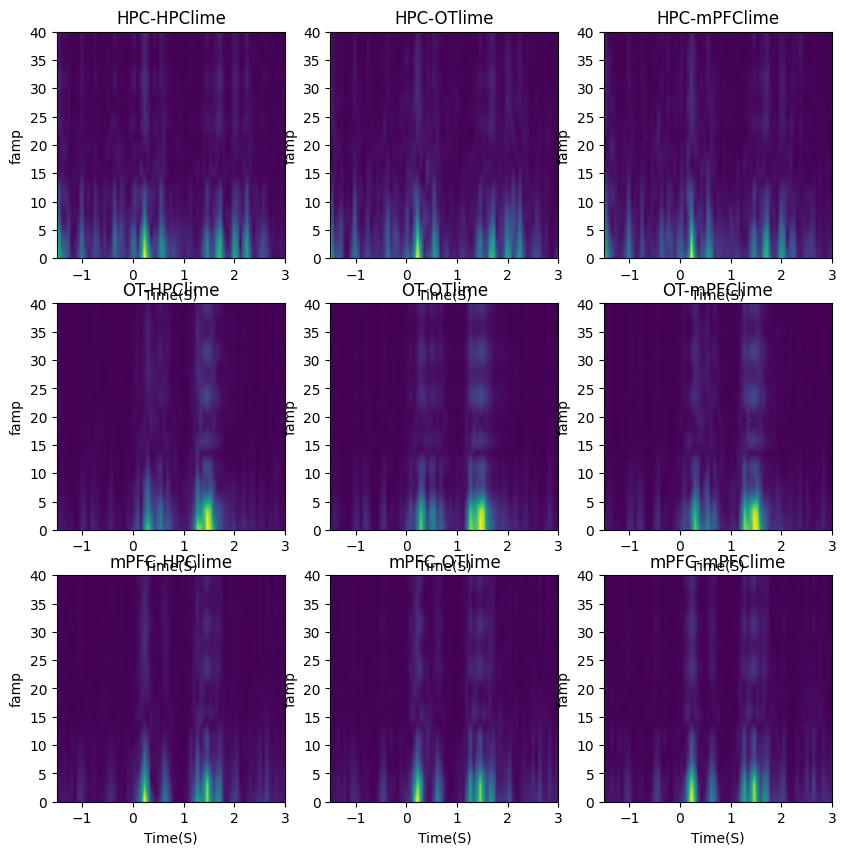

In [ ]:
def calc_tvPAC(data, fph_range, famp_range, t_win, overlap):

    ##############################
    # To Do: complete the function
    ##############################

    L = data.shape[-1]
    tvpac = []

    for t in range(int((L-overlap)/(t_win-overlap))):
      fphs, famps, PAC = calc_PAC(data, fph_range, famp_range, [int(t*(t_win-overlap)), int(t*(t_win-overlap)+t_win)])
      tvpac.append(PAC)

    return np.mean(np.array(tvpac), -2)
    pass


window_size = int(0.25 * fs)

overlap = int(0.75 * window_size)


fig = plt.figure(figsize=(10, 10))
tvpac = calc_tvPAC(ERP['banana'], [4, 8], [20, 60], window_size, overlap)
n_plot = 0
for i in range(3):
  for j in range(3):
    n_plot += 1
    plt.subplot(3, 3, n_plot)
    plt.imshow(np.rot90(tvpac[:, i, j]), interpolation='bilinear', aspect='auto', extent=[-1.5,3,0,40])
    plt.ylabel('famp')
    plt.xlabel('Time(S)')
    plt.title(ch_names[i] +'-'+ ch_names[j]+ 'banana')
plt.show()


fig = plt.figure(figsize=(10, 10))
tvpac = calc_tvPAC(ERP['lime'], [4, 8], [20, 60], window_size, overlap)
n_plot = 0
for i in range(3):
  for j in range(3):
    n_plot += 1
    plt.subplot(3, 3, n_plot)
    plt.imshow(np.rot90(tvpac[:, i, j]), interpolation='bilinear', aspect='auto', extent=[-1.5,3,0,40])
    plt.ylabel('famp')
    plt.xlabel('Time(S)')
    plt.title(ch_names[i] +'-'+ ch_names[j]+ 'lime')
plt.show()

You should generate plots like this between all channels for both odorants:<br>

![](https://github.com/arminnv/Neuroscience-Learning-Memory-and-Cognition-Spring-2024/blob/main/Figures/05-PAC-vtime.png?raw=1)<br>
*figure description: tv-PAC of hippocampus theta phase and hippocampus low gamma amplitude*

# Bonus: Modulation Index (MI) `+10 Points`

The Mean Vector Length (MVL) is not the only method for calculating Phase-Amplitude Coupling (PAC); another alternative is the Modulation Index (MI). You can find a detailed explanation of this method in [this paper](https://doi.org/10.1073/pnas.0810524105).

Simply implement the MI method and compute the time-varying PAC (tv-PAC) for each channel (l-PAC) and between channels (ir-PAC) using **ERP signals**. Then, compare the results with the MVL method used in the previous section. *`7 Points`*

`Theoretical Question:` In [this paper](https://doi.org/10.3389/fnins.2019.00573), different methods for calculating PAC and PLV and Generalized-Linear-Modeling-Cross-Frequency-Coupling (GLM) are evaluated. After reading the paper, determine when we should use MVL or MI for calculating PAC. *`3 Points`*

Answer:
We recommend the MI for noisy
and short data epochs with unknown forms of coupling. For high quality and long data
epochs with monophasic coupling and a high signal-to-noise ratio, the use of the MVL
is recommended. Ideally, both indices are reported simultaneously for one data set.


In [ ]:
def calc_MI(tfd1, tfd2, fph, famp):

    ##############################
    # To Do: complete the functions
    ##############################

    pass

In [ ]:

####################################################################
# To Do: Use your function to calculate the PAC and plot the results
####################################################################
